<a href="https://colab.research.google.com/github/MonikaLamba/Tensor-Flow-/blob/main/convolution_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0


In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [ ]:
# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)



MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5024 - accuracy: 0.8233
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3743 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3363 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3131 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2953 - accuracy: 0.8910


In [ ]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)



MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.3671 - accuracy: 0.8656


In [ ]:
# Define the model
model = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)



MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.4585 - accuracy: 0.8331
Epoch 2/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.3068 - accuracy: 0.8876
Epoch 3/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2642 - accuracy: 0.9014
Epoch 4/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2335 - accuracy: 0.9124
Epoch 5/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2104 - accuracy: 0.9208


In [ ]:
# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)



MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1983 - accuracy: 0.9262
Epoch 2/5
1343/1875 [====================>.........] - ETA: 13s - loss: 0.1750 - accuracy: 0.9351

KeyboardInterrupt: 

In [ ]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)



MODEL EVALUATION:
313/313 [==============================] - 2s 8ms/step - loss: 0.2927 - accuracy: 0.8946


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]
1/1 [==============================] - 0s 24ms/step


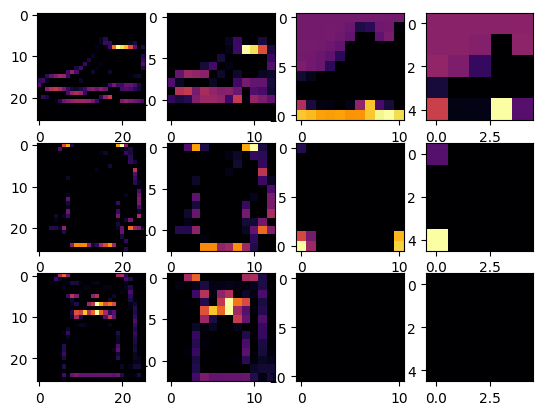

In [ ]:
print(test_labels[:100])
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=4
THIRD_IMAGE=1
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
